In [1]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile


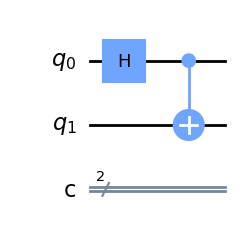

In [2]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.draw(output='mpl')

In [3]:
backend = StatevectorSimulator()
statevector=backend.run(assemble(circuit)).result().get_statevector()
statevector

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

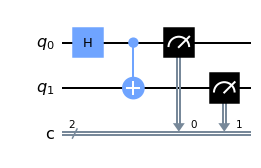

In [4]:
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [5]:
backend = QasmSimulatorPy()
new_circuit = transpile(circuit, backend)
counts1=backend.run(assemble(new_circuit)).result().get_counts()
counts1

{'11': 513, '00': 511}

In [7]:
provider  = IBMQ.load_account()

from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits > 1 
                                       and not x.configuration().simulator))
backend.name()

'ibmq_belem'

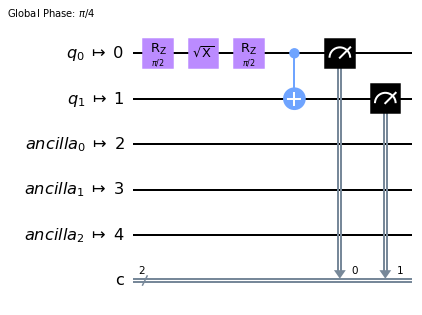

In [8]:
from qiskit import transpile

new_circuit = transpile(circuit, backend)
new_circuit.draw(output='mpl')

In [ ]:
from qiskit.tools.monitor import job_monitor

job = backend.run(new_circuit)
job_monitor(job)

In [ ]:
from qiskit.visualization import plot_histogram

result = job.result()
counts2 = result.get_counts()
plot_histogram([counts1,counts2])

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])
backend_sim = QasmSimulatorPy()
transpiled_qc = transpile(qc, backend_sim)
result = backend_sim.run(transpiled_qc).result()
print(result.get_counts(qc))
